## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9746104	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9562425	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9374257	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9216279	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9060835	total: 63ms	remaining: 12.5s
5:	learn: 0.8893226	total: 64ms	remaining: 10.6s
6:	learn: 0.8741443	total: 65ms	remaining: 9.22s
7:	learn: 0.8585035	total: 66ms	remaining: 8.18s
8:	learn: 0.8436626	total: 66.9ms	remaining: 7.37s
9:	learn: 0.8272388	total: 67.8ms	remaining: 6.71s
10:	learn: 0.8119983	total: 68.6ms	remaining: 6.17s
11:	learn: 0.7985098	total: 69.5ms	remaining: 5.72s
12:	learn: 0.7835980	total: 70.6ms	remaining: 5.36s
13:	learn: 0.7690760	total: 71.5ms	remaining: 5.04s
14:	learn: 0.7565531	total: 72.4ms	remaining: 4.75s
15:	learn: 0.7427156	total: 73.3ms	remaining: 4.51s
16:	learn: 0.7313448	total: 74.1ms	remaining: 4.29s
17:	learn: 0.7193022	total: 75ms	remaining: 4.09s
18:	learn: 0.7081054	total: 75.9ms	remaining: 3.92s
19

58:	learn: 0.4380280	total: 108ms	remaining: 1.72s
59:	learn: 0.4351472	total: 109ms	remaining: 1.7s
60:	learn: 0.4308016	total: 109ms	remaining: 1.69s
61:	learn: 0.4269361	total: 110ms	remaining: 1.67s
62:	learn: 0.4226644	total: 111ms	remaining: 1.65s
63:	learn: 0.4192363	total: 112ms	remaining: 1.64s
64:	learn: 0.4164586	total: 113ms	remaining: 1.62s
65:	learn: 0.4130039	total: 114ms	remaining: 1.61s
66:	learn: 0.4094627	total: 114ms	remaining: 1.59s
67:	learn: 0.4065309	total: 115ms	remaining: 1.58s
68:	learn: 0.4033870	total: 116ms	remaining: 1.56s
69:	learn: 0.3998744	total: 117ms	remaining: 1.55s
70:	learn: 0.3961537	total: 118ms	remaining: 1.54s
71:	learn: 0.3927536	total: 118ms	remaining: 1.52s
72:	learn: 0.3905939	total: 119ms	remaining: 1.51s
73:	learn: 0.3875416	total: 120ms	remaining: 1.5s
74:	learn: 0.3845216	total: 121ms	remaining: 1.49s
75:	learn: 0.3822875	total: 122ms	remaining: 1.48s
76:	learn: 0.3787237	total: 123ms	remaining: 1.47s
77:	learn: 0.3751261	total: 123ms

159:	learn: 0.2554705	total: 192ms	remaining: 1.01s
160:	learn: 0.2547936	total: 193ms	remaining: 1.01s
161:	learn: 0.2540194	total: 194ms	remaining: 1s
162:	learn: 0.2533217	total: 195ms	remaining: 1s
163:	learn: 0.2524712	total: 196ms	remaining: 997ms
164:	learn: 0.2518874	total: 196ms	remaining: 994ms
165:	learn: 0.2512831	total: 197ms	remaining: 991ms
166:	learn: 0.2505072	total: 198ms	remaining: 988ms
167:	learn: 0.2496881	total: 199ms	remaining: 985ms
168:	learn: 0.2490007	total: 200ms	remaining: 982ms
169:	learn: 0.2484939	total: 201ms	remaining: 979ms
170:	learn: 0.2478453	total: 201ms	remaining: 976ms
171:	learn: 0.2469042	total: 202ms	remaining: 973ms
172:	learn: 0.2461154	total: 203ms	remaining: 970ms
173:	learn: 0.2454083	total: 204ms	remaining: 968ms
174:	learn: 0.2449213	total: 205ms	remaining: 965ms
175:	learn: 0.2443095	total: 205ms	remaining: 962ms
176:	learn: 0.2433402	total: 206ms	remaining: 959ms
177:	learn: 0.2428856	total: 207ms	remaining: 956ms
178:	learn: 0.2425

286:	learn: 0.1836201	total: 298ms	remaining: 740ms
287:	learn: 0.1830136	total: 299ms	remaining: 739ms
288:	learn: 0.1826437	total: 300ms	remaining: 737ms
289:	learn: 0.1823072	total: 300ms	remaining: 735ms
290:	learn: 0.1817457	total: 301ms	remaining: 733ms
291:	learn: 0.1816127	total: 302ms	remaining: 732ms
292:	learn: 0.1812793	total: 303ms	remaining: 730ms
293:	learn: 0.1809588	total: 304ms	remaining: 729ms
294:	learn: 0.1805821	total: 304ms	remaining: 727ms
295:	learn: 0.1802484	total: 305ms	remaining: 725ms
296:	learn: 0.1797921	total: 306ms	remaining: 724ms
297:	learn: 0.1794649	total: 307ms	remaining: 723ms
298:	learn: 0.1788202	total: 308ms	remaining: 721ms
299:	learn: 0.1785771	total: 309ms	remaining: 720ms
300:	learn: 0.1782177	total: 309ms	remaining: 719ms
301:	learn: 0.1779297	total: 311ms	remaining: 718ms
302:	learn: 0.1777943	total: 312ms	remaining: 717ms
303:	learn: 0.1775273	total: 312ms	remaining: 715ms
304:	learn: 0.1771047	total: 313ms	remaining: 714ms
305:	learn: 

389:	learn: 0.1469868	total: 383ms	remaining: 599ms
390:	learn: 0.1466562	total: 384ms	remaining: 598ms
391:	learn: 0.1462894	total: 385ms	remaining: 597ms
392:	learn: 0.1459824	total: 386ms	remaining: 595ms
393:	learn: 0.1456313	total: 386ms	remaining: 594ms
394:	learn: 0.1455820	total: 387ms	remaining: 593ms
395:	learn: 0.1455120	total: 388ms	remaining: 592ms
396:	learn: 0.1453086	total: 389ms	remaining: 591ms
397:	learn: 0.1452639	total: 390ms	remaining: 589ms
398:	learn: 0.1451038	total: 391ms	remaining: 588ms
399:	learn: 0.1447916	total: 392ms	remaining: 588ms
400:	learn: 0.1446078	total: 393ms	remaining: 587ms
401:	learn: 0.1445294	total: 394ms	remaining: 586ms
402:	learn: 0.1443055	total: 394ms	remaining: 584ms
403:	learn: 0.1439301	total: 395ms	remaining: 583ms
404:	learn: 0.1437050	total: 396ms	remaining: 582ms
405:	learn: 0.1435615	total: 397ms	remaining: 581ms
406:	learn: 0.1432072	total: 398ms	remaining: 580ms
407:	learn: 0.1431525	total: 399ms	remaining: 578ms
408:	learn: 

515:	learn: 0.1197015	total: 488ms	remaining: 457ms
516:	learn: 0.1195628	total: 489ms	remaining: 456ms
517:	learn: 0.1193118	total: 490ms	remaining: 456ms
518:	learn: 0.1190796	total: 491ms	remaining: 455ms
519:	learn: 0.1190014	total: 493ms	remaining: 455ms
520:	learn: 0.1188472	total: 493ms	remaining: 454ms
521:	learn: 0.1187430	total: 494ms	remaining: 452ms
522:	learn: 0.1185016	total: 495ms	remaining: 451ms
523:	learn: 0.1181930	total: 496ms	remaining: 450ms
524:	learn: 0.1181332	total: 497ms	remaining: 450ms
525:	learn: 0.1179440	total: 498ms	remaining: 449ms
526:	learn: 0.1176635	total: 499ms	remaining: 448ms
527:	learn: 0.1174593	total: 500ms	remaining: 447ms
528:	learn: 0.1172784	total: 503ms	remaining: 447ms
529:	learn: 0.1170853	total: 504ms	remaining: 447ms
530:	learn: 0.1170548	total: 504ms	remaining: 445ms
531:	learn: 0.1168682	total: 506ms	remaining: 445ms
532:	learn: 0.1165082	total: 517ms	remaining: 453ms
533:	learn: 0.1163012	total: 518ms	remaining: 452ms
534:	learn: 

572:	learn: 0.1103874	total: 575ms	remaining: 428ms
573:	learn: 0.1102736	total: 576ms	remaining: 427ms
574:	learn: 0.1100751	total: 577ms	remaining: 426ms
575:	learn: 0.1097669	total: 578ms	remaining: 425ms
576:	learn: 0.1095717	total: 578ms	remaining: 424ms
577:	learn: 0.1095420	total: 579ms	remaining: 423ms
578:	learn: 0.1095126	total: 580ms	remaining: 422ms
579:	learn: 0.1093271	total: 581ms	remaining: 421ms
580:	learn: 0.1091892	total: 582ms	remaining: 419ms
581:	learn: 0.1091648	total: 582ms	remaining: 418ms
582:	learn: 0.1090161	total: 583ms	remaining: 417ms
583:	learn: 0.1089534	total: 584ms	remaining: 416ms
584:	learn: 0.1087676	total: 585ms	remaining: 415ms
585:	learn: 0.1086017	total: 586ms	remaining: 414ms
586:	learn: 0.1085758	total: 587ms	remaining: 413ms
587:	learn: 0.1083684	total: 588ms	remaining: 412ms
588:	learn: 0.1081681	total: 588ms	remaining: 411ms
589:	learn: 0.1080033	total: 589ms	remaining: 409ms
590:	learn: 0.1079585	total: 590ms	remaining: 408ms
591:	learn: 

697:	learn: 0.0943162	total: 680ms	remaining: 294ms
698:	learn: 0.0941485	total: 681ms	remaining: 293ms
699:	learn: 0.0940385	total: 682ms	remaining: 292ms
700:	learn: 0.0938914	total: 683ms	remaining: 291ms
701:	learn: 0.0936817	total: 683ms	remaining: 290ms
702:	learn: 0.0935548	total: 684ms	remaining: 289ms
703:	learn: 0.0934546	total: 685ms	remaining: 288ms
704:	learn: 0.0933643	total: 686ms	remaining: 287ms
705:	learn: 0.0932588	total: 687ms	remaining: 286ms
706:	learn: 0.0930359	total: 687ms	remaining: 285ms
707:	learn: 0.0929454	total: 688ms	remaining: 284ms
708:	learn: 0.0927817	total: 689ms	remaining: 283ms
709:	learn: 0.0926212	total: 690ms	remaining: 282ms
710:	learn: 0.0924965	total: 691ms	remaining: 281ms
711:	learn: 0.0924817	total: 691ms	remaining: 280ms
712:	learn: 0.0923782	total: 692ms	remaining: 279ms
713:	learn: 0.0922962	total: 693ms	remaining: 278ms
714:	learn: 0.0922084	total: 694ms	remaining: 277ms
715:	learn: 0.0921033	total: 695ms	remaining: 276ms
716:	learn: 

801:	learn: 0.0810375	total: 765ms	remaining: 189ms
802:	learn: 0.0809039	total: 766ms	remaining: 188ms
803:	learn: 0.0808891	total: 767ms	remaining: 187ms
804:	learn: 0.0807992	total: 767ms	remaining: 186ms
805:	learn: 0.0807047	total: 768ms	remaining: 185ms
806:	learn: 0.0805814	total: 769ms	remaining: 184ms
807:	learn: 0.0804608	total: 770ms	remaining: 183ms
808:	learn: 0.0804451	total: 771ms	remaining: 182ms
809:	learn: 0.0803486	total: 772ms	remaining: 181ms
810:	learn: 0.0801919	total: 773ms	remaining: 180ms
811:	learn: 0.0800426	total: 774ms	remaining: 179ms
812:	learn: 0.0799790	total: 775ms	remaining: 178ms
813:	learn: 0.0798667	total: 776ms	remaining: 177ms
814:	learn: 0.0796921	total: 777ms	remaining: 176ms
815:	learn: 0.0795940	total: 777ms	remaining: 175ms
816:	learn: 0.0794022	total: 778ms	remaining: 174ms
817:	learn: 0.0793296	total: 779ms	remaining: 173ms
818:	learn: 0.0792045	total: 780ms	remaining: 172ms
819:	learn: 0.0791872	total: 781ms	remaining: 171ms
820:	learn: 

928:	learn: 0.0685754	total: 870ms	remaining: 66.5ms
929:	learn: 0.0684965	total: 871ms	remaining: 65.6ms
930:	learn: 0.0684366	total: 872ms	remaining: 64.6ms
931:	learn: 0.0683631	total: 873ms	remaining: 63.7ms
932:	learn: 0.0682764	total: 874ms	remaining: 62.7ms
933:	learn: 0.0682140	total: 875ms	remaining: 61.8ms
934:	learn: 0.0681052	total: 876ms	remaining: 60.9ms
935:	learn: 0.0680869	total: 876ms	remaining: 59.9ms
936:	learn: 0.0679698	total: 877ms	remaining: 59ms
937:	learn: 0.0678842	total: 878ms	remaining: 58ms
938:	learn: 0.0677485	total: 879ms	remaining: 57.1ms
939:	learn: 0.0676865	total: 879ms	remaining: 56.1ms
940:	learn: 0.0675816	total: 880ms	remaining: 55.2ms
941:	learn: 0.0675058	total: 881ms	remaining: 54.2ms
942:	learn: 0.0674853	total: 882ms	remaining: 53.3ms
943:	learn: 0.0674534	total: 883ms	remaining: 52.4ms
944:	learn: 0.0673819	total: 883ms	remaining: 51.4ms
945:	learn: 0.0672811	total: 884ms	remaining: 50.5ms
946:	learn: 0.0671940	total: 885ms	remaining: 49.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

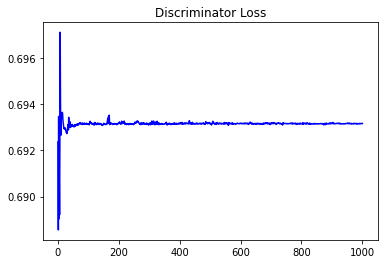

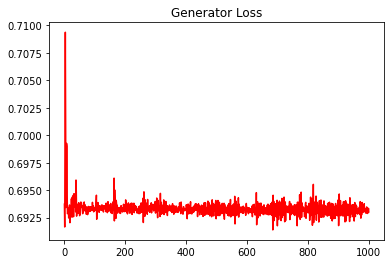

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08402168706493764


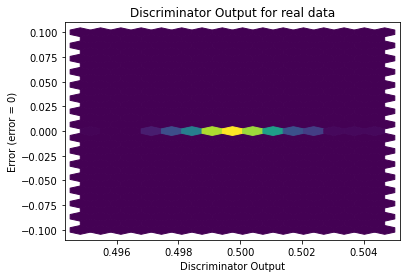

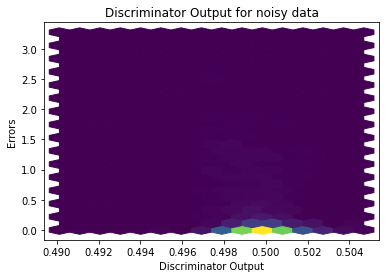

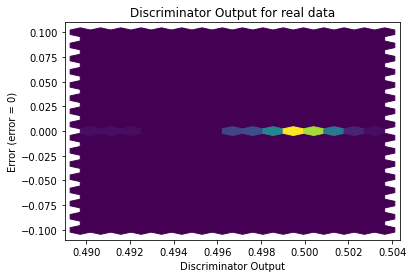

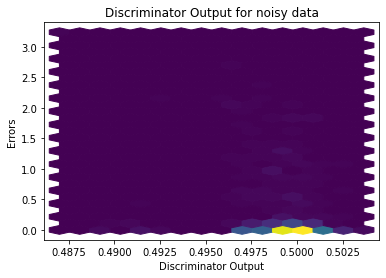

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


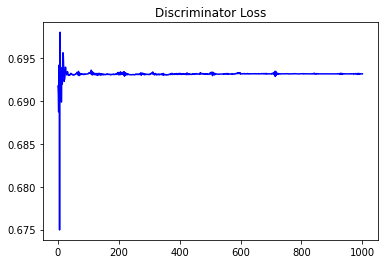

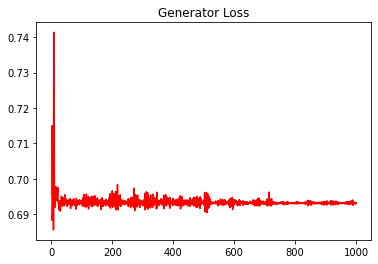

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0801734192093531


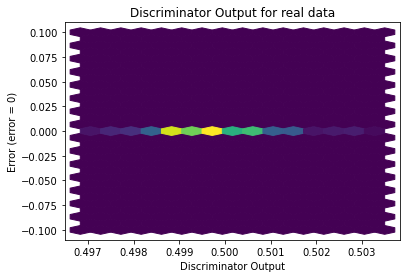

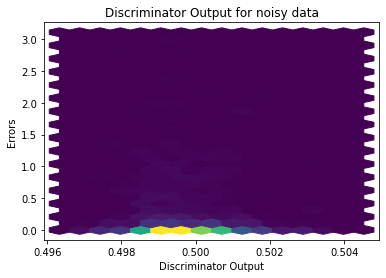

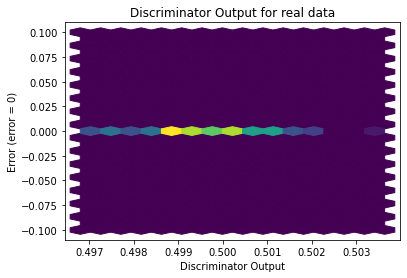

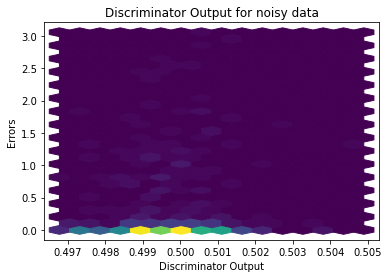

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1173]], requires_grad=True)
